In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/births.csv')
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [2]:
df2 = df.groupby(['year', 'gender'])
data1 = df2.births.sum().to_frame()
data1

births
year gender         
1969 F       1753634
     M       1846572
1970 F       1819164
     M       1918636
1971 F       1736774
...              ...
2006 M       2188268
2007 F       2111890
     M       2212118
2008 F       2077929
     M       2177227

[80 rows x 1 columns]

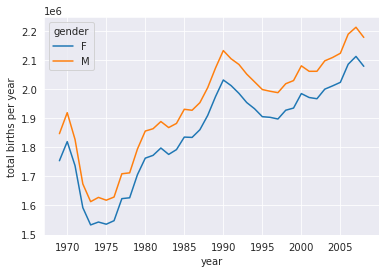

In [3]:
with sns.axes_style('darkgrid'):
    ax = sns.lineplot(x = 'year', y = 'births', hue = 'gender', data = data1)
    ax.set(xlabel = 'year', ylabel = 'total births per year')

In [4]:
#QUESTION 1.2
#Periodic component: the length of the repeating values seen in the graph. Much like the number of births, 
#which are constantly going up and down, the periodic component is showing that over time, the number of births
#are continuously increasing and decreasing by different quantities. The areas where the amplitudes are seemingly 
#smaller (mid-March to June) imply that the number of births did not change significantly during those times. 
#Higher amplitudes indicate greater differences in birth numbers.
#Residual: the residual data accounts for the changes in the expected (predicted) mean data of the original plot. 
#It is a graph that shows the expected values, rather than the observed values. The expected values are the 
#likelihood number of births that will occur on that day. A woman that is in labor has a 50% change of giving 
#birth or not giving birth on that day, depending on the time of day and the difficulty of the pregnancy. 
#Plot 1: summarizes the actual values observed and the "smoothed" line shows the trend of birth numbers. 
#The mean is stable at 100 because on the left side of the plot, most births are generally below the mean. 
#On the right side, most births are generally above the mean. It therefore balances out to 100.

In [5]:
#I mostly completed this question, but had issues getting my ax.hlines to work. Used Matt's solution for that.
quartiles = np.percentile(df['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
df = df.query('(births > @mu - 5 * @sig) & births < @mu + 5 * @sig')
df.index = pd.to_datetime(10000 * df.year + 100 * df.month + df.day, format = '%Y%m%d')
df = df.pivot_table('births', [df.index.month, df.index.day])
df.index = [pd.datetime(2020, month, day) for (month, day) in df.index]

<ipython-input-5-cc28f66c1557>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df.index = [pd.datetime(2020, month, day) for (month, day) in df.index]


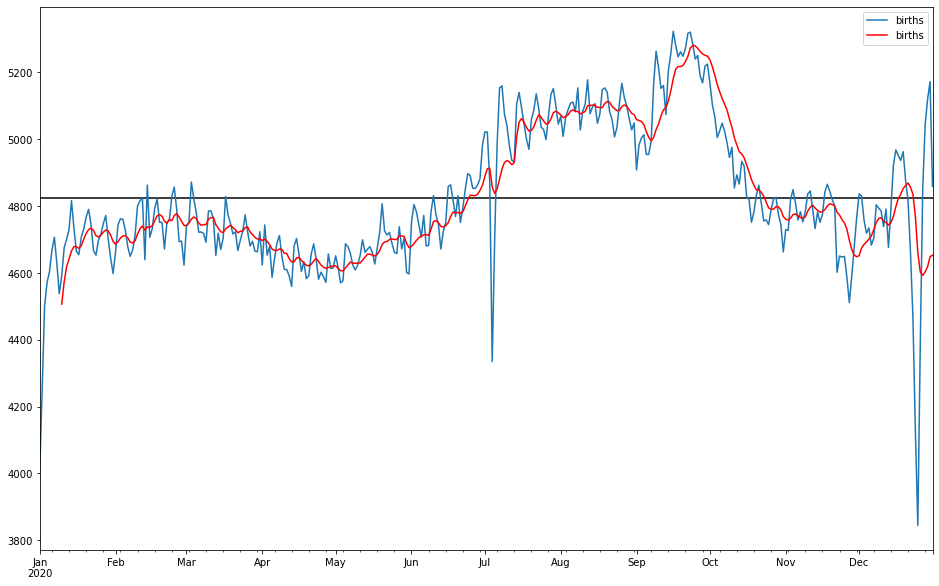

In [6]:
fig, ax = plt.subplots(figsize = (16, 10))
df.plot(ax = ax)
df.rolling(window = 10).mean().plot(color = 'r', ax = ax)
ax.hlines(df.births.mean(), df.index[0], df.index[-1])

In [7]:
#Question 2
import json

#from json_data lecture
with open('recipe.json') as f:
    line = f.readline()
    data = (line.strip() for line in f)
    data_json = f"[{','.join(data)}]"
recipes = pd.read_json(data_json)
recipes.shape

(173277, 17)

In [8]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [9]:
def recommended_recipes(food, recipes):
    recipe_id = []
    ingredient_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley','rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
    spices = pd.DataFrame(dict((ingredient, recipes.ingredients.str.contains(ingredient)) for ingredient in ingredient_list))
    ingredients_together = '&'.join(food)
    recipe_id.append(spices.query(ingredients_together).index)
    return recipe_id

food = ['parsley', 'paprika', 'tarragon']
recommended_recipes(food, recipes)

[Int64Index([2068, 74963, 93767, 113925, 137685, 140529, 158474, 158485, 163174,
             165242],
            dtype='int64')]

In [10]:
#Question 3

dfcred = pd.read_csv('archive/credits.csv')
dfcred

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [11]:
dfcred.crew = dfcred.crew.apply(lambda x: eval(x))

def director(crew):
    for person in crew:
        if person['job'] == 'Director':
            return person['name']

In [12]:
dfcred['Director'] = dfcred.crew.apply(director)
directors = dfcred['Director']
dfcred['Director'] = directors
dfcred

,cast,crew,id,Director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer
...,...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,Hamid Nematollah
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,Lav Diaz
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,Mark L. Lester
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,Yakov Protazanov


In [13]:
df = dfcred[['id', 'Director']]
df.id.astype(str)
df['id'] = df['id'].astype(str)

<ipython-input-13-776e6c9a817b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df['id'].astype(str)


In [14]:
dfmeta = pd.read_csv('archive/movies_metadata.csv')
dfmeta

/Users/mike_stein612/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [15]:
df2 = dfmeta[['id', 'vote_average', 'vote_count']]
df2

,id,vote_average,vote_count
0,862,7.7,5415.0
1,8844,6.9,2413.0
2,15602,6.5,92.0
3,31357,6.1,34.0
4,11862,5.7,173.0
...,...,...,...
45461,439050,4.0,1.0
45462,111109,9.0,3.0
45463,67758,3.8,6.0
45464,227506,0.0,0.0


In [16]:
merged = pd.merge(df, df2, on = 'id')
merged = merged[merged.vote_count > 1000]
merged

,id,Director,vote_average,vote_count
0,862,John Lasseter,7.7,5415.0
1,8844,Joe Johnston,6.9,2413.0
5,949,Michael Mann,7.7,1886.0
9,710,Martin Campbell,6.6,1194.0
15,524,Martin Scorsese,7.8,1343.0
...,...,...,...,...
43719,339403,Edgar Wright,7.2,2083.0
44084,324852,Kyle Balda,6.2,2002.0
44349,281338,Matt Reeves,6.7,1675.0
44753,374720,Christopher Nolan,7.5,2712.0


In [17]:
results = merged.groupby('Director')[['vote_average']].mean()
results.sort_values(by = 'vote_average', ascending = False)

,vote_average
Director,
Makoto Shinkai,8.5
Roberto Benigni,8.3
Irvin Kershner,8.2
Eric Toledano,8.2
Fernando Meirelles,8.2
...,...
John Moore,5.2
Mark Steven Johnson,5.1
Harmony Korine,5.0
